In [10]:
from sklearn import datasets
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
# MNIST 손글씨 데이터 로드
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target
X_train, X_test, y_train, y_test=train_test_split(features,labels,test_size=0.2)

In [12]:
# 단일 모델 정확도 측정
# 의사결정 트리, kNN, SVM 모델 정확도 측정하기

dtree = tree.DecisionTreeClassifier(
    criterion="gini", max_depth=8, max_features=32, random_state=35
)

dtree = dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=299).fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

svm = SVC(C=0.1, gamma=0.003,
          probability=True, random_state=35).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)

In [13]:
print("[Accuracy]")
print("D-tree : ", accuracy_score(y_test, dtree_predicted))
print("kNN : ", accuracy_score(y_test, knn_predicted))
print("SVM : ", accuracy_score(y_test, svm_predicted))

[Accuracy]
D-tree :  0.825
kNN :  0.8472222222222222
SVM :  0.8888888888888888


In [20]:
svm_proba = svm.predict_proba(X_test)
print(svm_proba[0:2])

[[9.99922997e-01 5.52854228e-06 1.02868509e-05 6.53541209e-06
  4.49230471e-06 6.55137009e-06 1.98598816e-05 7.55839281e-06
  7.31744999e-06 8.87241683e-06]
 [6.64494522e-03 4.21535803e-01 4.11487266e-02 1.45145956e-02
  1.42079393e-02 5.40601014e-02 7.41327251e-03 2.01516532e-02
  3.91786941e-01 2.85360216e-02]]


In [21]:
# 하드 보팅
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)
], weights=[1, 1, 1], voting='hard').fit(X_train, y_train)
hard_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

0.9194444444444444

In [22]:
# 소프트 보팅
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)
], weights=[1, 1, 1], voting='soft').fit(X_train, y_train)
soft_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

0.9

([<matplotlib.axis.XTick at 0x7ff21e3bb280>,
 [Text(0, 0, 'decision tree'),
  Text(1, 0, 'knn'),
  Text(2, 0, 'svm'),
  Text(3, 0, 'hard voting'),
  Text(4, 0, 'soft voting')])

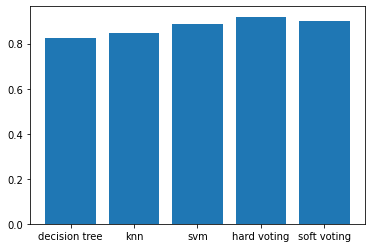

In [23]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(5)
plt.bar(x, height= [accuracy_score(y_test, dtree_predicted),
                    accuracy_score(y_test, knn_predicted),
                    accuracy_score(y_test, svm_predicted),
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted)])
plt.xticks(x, ['decision tree', 'knn', 'svm', 'hard voting', 'soft voting'])